# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils as im
import skimage.measure as measure

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [3]:
def dilect(image,kernel): 
    """
    image should be in binary format(0 or 1).
    """
    conv=cv2.filter2D(image,-1,kernel,borderType=cv2.BORDER_REPLICATE)
    
    di = (conv>0).astype(np.uint8)
    # print(di[50])
    return di

def erode(image,kernel): 
    conv=cv2.filter2D(image,-1,kernel,borderType=cv2.BORDER_REPLICATE)
    
    # plt.imshow(conv,cmap='gray')
    n=np.sum(kernel)
    # print("sum:",n)
    er = (conv>= n).astype(np.uint8)
    
    return er

def reverse(image):
    max_n=np.max(image)
    # print("max:",max_n)
    return (max_n-image)//max_n

def check_zero(image):
    return np.sum(image)==0


Implement this function to get the input image and return the skeleton of the input image.

In [4]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy().astype(np.uint8)
    params = None
    
    #Write your code here
    _,res = cv2.threshold(res,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    res = reverse(res)
    
    
    kernel = [[0,1,0],[1,1,1],[0,1,0]]
    kernel = np.array(kernel)

    skeleton = []

    while not check_zero(res): 
    
        er = erode(res, kernel)
        di = dilect(er, kernel)
        diff = res - di
        skeleton.append(diff)
        res = er
    
    z = np.zeros_like(res)
    for s in skeleton:
        z+=s
    # plt.figure()
    # plt.imshow(z,cmap = "gray")
    
    res = z
    params = skeleton
    
    return res, params

In [5]:
# for testing functions
image1 = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image1_skeleton, params1 = get_skeleton(image1)

Test your implementation (don't change this cell).

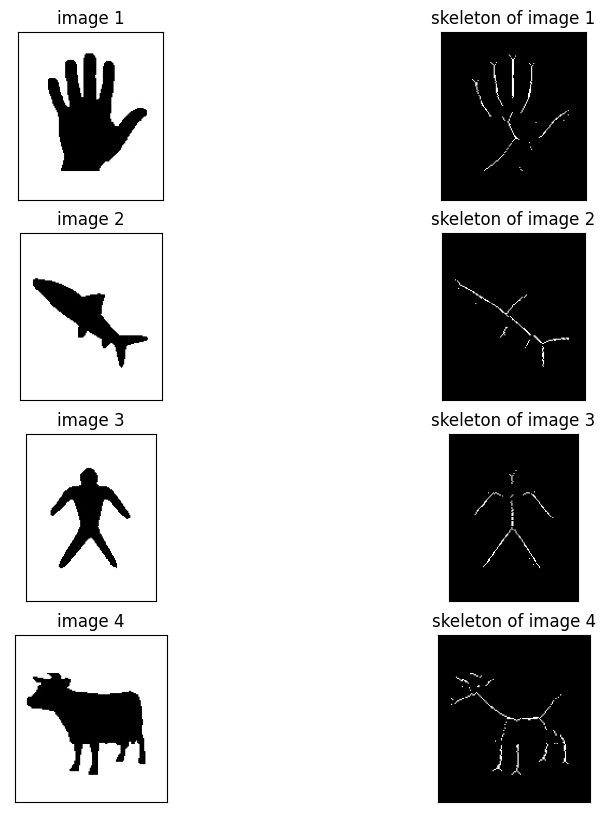

In [6]:
image_list = []

image1 = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [7]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    kernel = [[0,1,0],[1,1,1],[0,1,0]]
    kernel = np.array(kernel)
    z = np.zeros_like(res)    
    
    #Write your code here
    for p in params[::-1]:
        di = dilect(z,kernel)
        z = p + di
    
    res = z   
    
    return res

Test your implementation (don't change this cell).

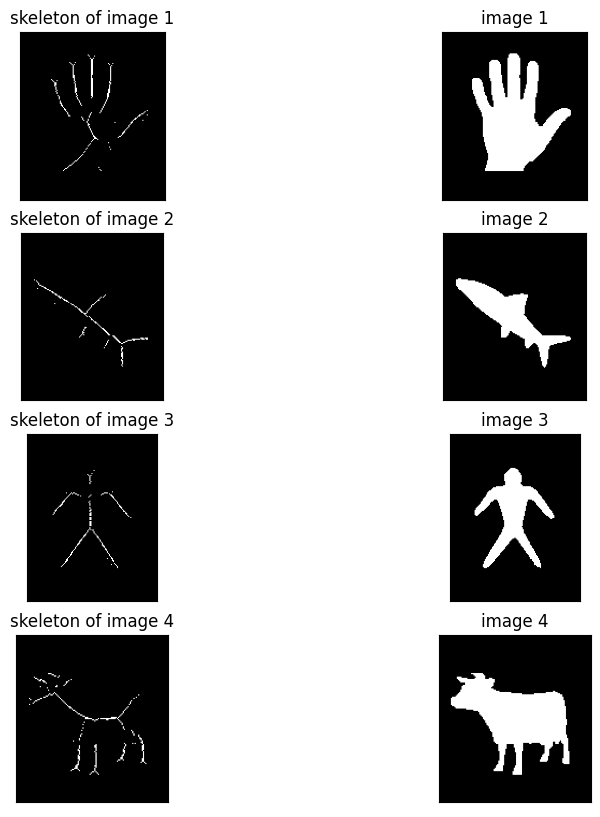

In [8]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [9]:
kernel=cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE,(2,2)
    )
def opening(image,kernel=kernel):
    
    dialect=cv2.dilate(image,kernel=kernel,borderType=cv2.BORDER_REPLICATE)
    erode=cv2.erode(dialect,kernel=kernel,iterations=2,borderType=cv2.BORDER_REPLICATE)
    return(erode)
    
def closing(image,kernel=kernel):

    erode=cv2.erode(image,kernel=kernel,borderType=cv2.BORDER_REPLICATE)
    dilect=cv2.dilate(erode,kernel=kernel,borderType=cv2.BORDER_REPLICATE)
    return(dilect)
    

Implement this function to detect shapes and number of cars in an input image.

In [10]:
# reference:https://pyimagesearch.com/2016/02/01/opencv-center-of-contour/

def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = 0
    
    #Write your code here
    print(result.shape)
    avg=np.average(result,axis=2).astype(np.uint8)
    print(avg.shape)
    thresh=cv2.adaptiveThreshold(avg,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,17,10)
    
    
    op= opening(thresh)
    # plt.figure()
    # plt.imshow(op,cmap = 'gray')

    # apply close operator on binary image
    cl=closing(thresh)

    # plt.figure()
    # plt.imshow(cl,cmap = 'gray')

    cnts = cv2.findContours(cl.copy(), cv2.RETR_TREE,
	cv2.CHAIN_APPROX_SIMPLE)
    cnts = im.grab_contours(cnts)
    
    

    for c in cnts:
        area=cv2.contourArea(c)
        if area>300:
            # compute the center of the contour
            cars_num+=1
            M = cv2.moments(c)
            cX = int(M["m10"] / (M["m00"]+0.001))
            cY = int(M["m01"] / (M["m00"]+0.001))
            # draw the contour and center of the shape on the image
            cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
            cv2.circle(result, (cX, cY), 5, (255, 0, 255), -1)
            cv2.putText(result, "center", (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    # show the image
    # plt.figure()
    # plt.title("Image",)
    # plt.imshow( result,cmap="gray")
    
    
    return result,cars_num

In [11]:
image = cv2.imread('images/img5.jpg', cv2.IMREAD_COLOR)
res, count=detect_car_num(image)
print("number of cars detected: ", count)

(393, 590, 3)
(393, 590)
number of cars detected:  32


Test your implementation (don't change this cell).

(393, 590, 3)
(393, 590)


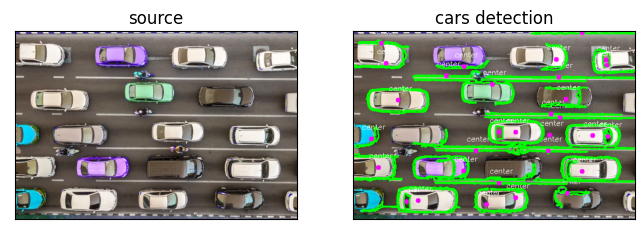

In [12]:
image_list = []
image = cv2.imread('images/img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [89]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = 0
    
    #Write your code here
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    print(result.shape)
    
    # change the image to grey scale
    kernel=cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE,(11,11)
    )

    er=opening(result,kernel)
    er = closing(result,kernel)
    er = cv2.erode(er,kernel)
    plt.figure()
    plt.imshow(er)
    plt.figure()
    avg=.7*er[:,:,0]+.2*er[:,:,1]+.0*er[:,:,2]

    plt.imshow(avg,cmap='gray')
    plt.figure()


    cnts = cv2.findContours(avg.copy().astype(np.uint8), cv2.RETR_TREE,
	cv2.CHAIN_APPROX_SIMPLE)
    cnts = im.grab_contours(cnts)
    
    for c in cnts:
        area=cv2.contourArea(c)
        if area>50:
            # compute the center of the contour
            flowers_num+=1
            M = cv2.moments(c)
            cX = int(M["m10"] / (M["m00"]+0.001))
            cY = int(M["m01"] / (M["m00"]+0.001))
            # draw the contour and center of the shape on the image
            cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
            cv2.circle(result, (cX, cY), 5, (255, 0, 255), -1)
            cv2.putText(result, "center", (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    return result,flowers_num

Test your implementation (don't change this cell).

(480, 720, 3)


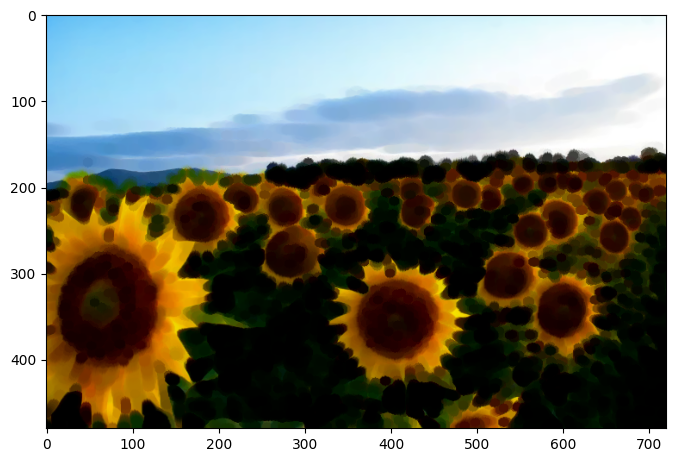

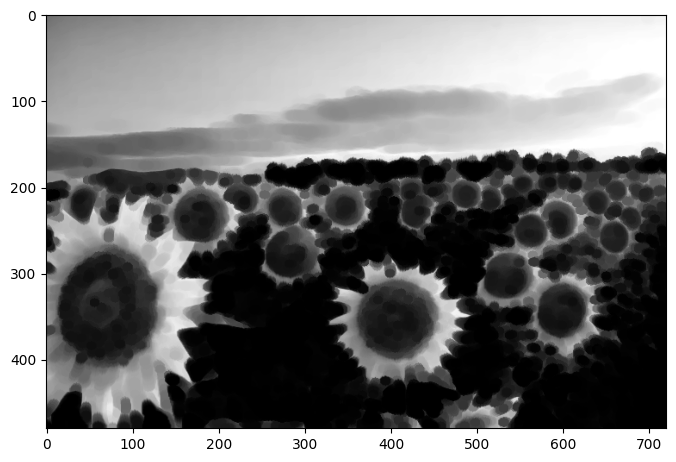

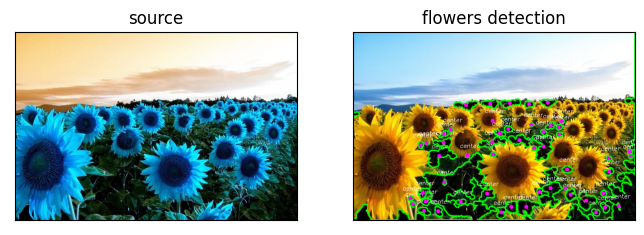

In [90]:
image_list = []
image = cv2.imread('images/img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!